In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
image_bgr = cv2.imread("./image.png")
image_rgb = cv2.cvtColor(image_bgr , cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_bgr , cv2.COLOR_BGR2GRAY)



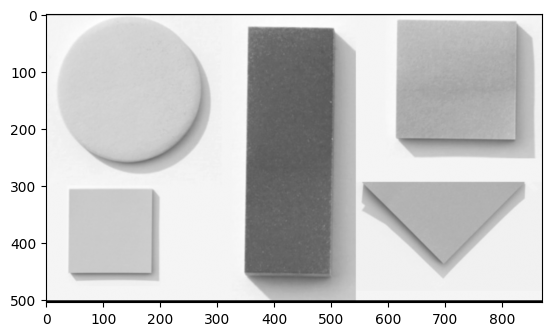

In [4]:
plt.imshow(image_gray , cmap="gray")

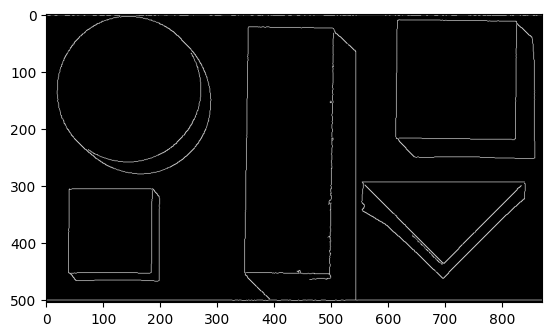

In [28]:
gray = cv2.Canny(image_gray , 30 , 150)
plt.imshow(gray , cmap="gray")

In [29]:
contours  , hiearchy = cv2.findContours(gray, cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE)

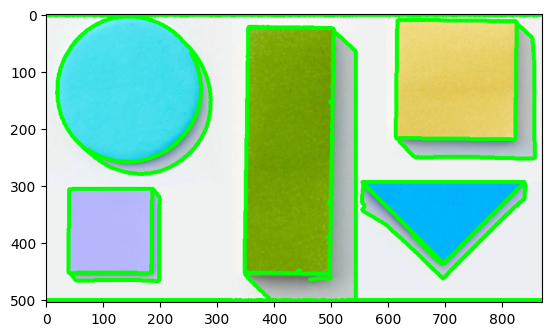

In [30]:
contour_image = image_bgr.copy()
finalimage = cv2.drawContours(contour_image  ,contours , -1 , (0,255,0) , 5)
plt.imshow(finalimage)

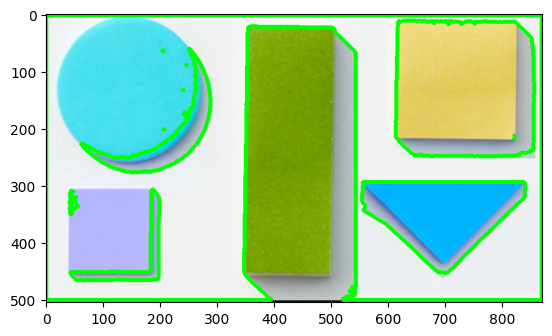

In [37]:
retval, binary = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contour_image_v2 = image_bgr.copy()
finalimagev2 = cv2.drawContours(contour_image_v2 , contours , -1 , (0,255,0) ,  5) 
plt.imshow(finalimagev2)

In [ ]:
# in range ile  belli başlı renkleri spesifikleştirerek sadece onlar üzerinde işlem yapabiliyoruz mesela yeşile özel boundariesler belirleyip sadece onları tespit edebiliyoruz mesela 


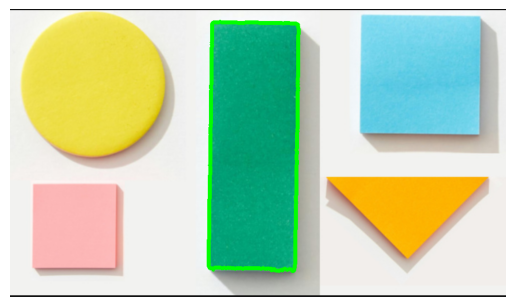

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Görüntüyü HSV'ye çevir
hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# 2. Yeşil için alt ve üst sınırlar (HSV)
lower_green = np.array([35, 40, 40], dtype=np.uint8)   # alt sınır (açık yeşil)
upper_green = np.array([85, 255, 255], dtype=np.uint8) # üst sınır (koyu yeşil)

# 3. Maske oluştur (sadece yeşil tonlar beyaz, geri kalan siyah)
mask = cv2.inRange(hsv, lower_green, upper_green)

# 4. Contour bul
contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 5. Çizim
contour_image_v2 = image_bgr.copy()
finalimagev2 = cv2.drawContours(contour_image_v2, contours, -1, (0,255,0), 5)

# 6. Görselleştir
plt.imshow(cv2.cvtColor(finalimagev2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


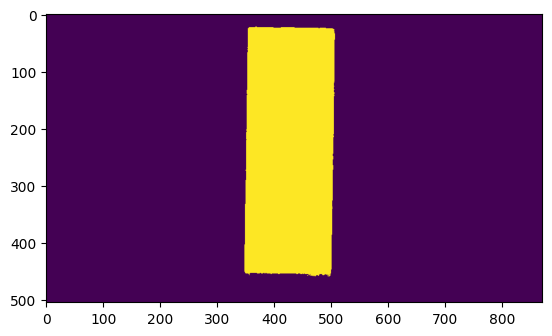

In [39]:
plt.imshow(mask)

Bulunan contour sayısı: 28


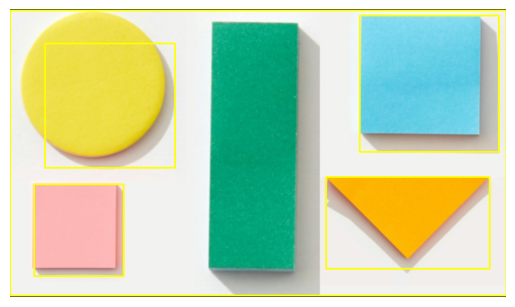

In [42]:
import cv2
import matplotlib.pyplot as plt

# 1. Görüntüyü griye çevir
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 2. Threshold uygula (binary görüntü)
retval, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# 3. Contour bul
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print("Bulunan contour sayısı:", len(contours))

# 4. Çizim için kopya al
contour_image = image_bgr.copy()

# 5. Kutuları çiz
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 10 and h > 10:   # küçük kutuları filtrele
        cv2.rectangle(contour_image, (x, y), (x+w, y+h), (0,255,255), 2)

# 6. Görselleştir (BGR -> RGB çevir)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
